<a href="https://colab.research.google.com/github/angel870326/NTU_Data_Mining/blob/main/MBTI_500_SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

> 2022.05.24 Ssu-Yun Wang<br/>
[Github @angel870326](https://github.com/angel870326)

# **MBTI Personality Types Classification - SVM & Model Saving**
Source of raw data: 
https://www.kaggle.com/datasets/zeyadkhalid/mbti-personality-types-500-dataset

### **Contents:**

*   Preprocessing
*   Feature Selection
*   **Support Vector Machines (SVM)**
    * Linear SVC
    * SVC
        * Linear kernel
        * Polynomial kernel
        * RBF kernel


In [ ]:
import pandas as pd
import numpy as np

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## **Preprocessing**

by 家怡 & 佳圻

In [ ]:
train_data = pd.read_csv('/content/drive/Shareddrives/110-2 資料探勘第4組/Project/traindata_lemma&stem.csv')
test_data = pd.read_csv('/content/drive/Shareddrives/110-2 資料探勘第4組/Project/testdata_lemma&stem.csv')

In [ ]:
train_data

,Unnamed: 0,posts,type
0,64196,user put sign usernam instanc meolem jumal fi ...,ENTJ
1,31881,year issu correct incorrect leav toss labor wi...,INTP
2,68961,steven spielberg nice rest trash curiou thing ...,ENTP
3,102426,bad situat actual lot respect lazi peopl make ...,INFP
4,19036,male friend quit liter drive crazi year ago da...,INTJ
...,...,...,...
84848,16713,ni sound also like stuff say think brilliant i...,INTJ
84849,28060,use time fare much good even feel someon pain ...,INTP
84850,29514,look super attract pic ye sometim see woman th...,INTP
84851,92206,way home school bu realli incent learn drive g...,INFJ


In [ ]:
train_data['type'].value_counts()

INTP    19969
INTJ    17941
INFJ    11970
INFP     9707
ENTP     9380
ENFP     4934
ISTP     2739
ENTJ     2364
ESTP     1589
ENFJ     1227
ISTJ      994
ISFP      700
ISFJ      520
ESTJ      386
ESFP      288
ESFJ      145
Name: type, dtype: int64

In [ ]:
test_data

,Unnamed: 0,posts,type
0,96021,khale hosseini book liter everi singl one make...,INFP
1,33212,display passion come natur make feel self cons...,INTP
2,89866,hard final commit colleg know could stay one p...,INFJ
3,98577,capit describ injustic shock econom orwel aldu...,INFP
4,62330,good stress even stress stress howev let forge...,ENTJ
...,...,...,...
21209,103821,express cuivat fi random burst creativ high em...,INFP
21210,8791,sens would give ton context exclud deja vu use...,INTJ
21211,36269,hear watch coupl video form neg bia disagre co...,INTP
21212,78831,abandon mention cloud badli myer case platform...,ESTP


### Small sample (optional)

In [ ]:
# train_data = train_data.sample(n=1000)
# test_data = test_data.sample(n=200)

## **Feature Selection**
by 家怡 & 佳圻

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords

In [ ]:
class Lemmatizer(object):
    def __init__(self):
        self.lemmatizer = WordNetLemmatizer()
    def __call__(self, sentence):
        return [self.lemmatizer.lemmatize(word) for word in sentence.split() if len(word)>2]

In [ ]:
import nltk
nltk.download('wordnet')
vectorizer = TfidfVectorizer(max_features=5000,stop_words='english',tokenizer=Lemmatizer())
vectorizer.fit(train_data.posts)

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  "The parameter 'token_pattern' will not be used"
/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:401: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ha', 'le', 'wa'] not in stop_words.
  % sorted(inconsistent)


TfidfVectorizer(max_features=5000, stop_words='english',
                tokenizer=<__main__.Lemmatizer object at 0x7fe8fc483a10>)

In [ ]:
feature_names = vectorizer.get_feature_names()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
train_post = vectorizer.transform(train_data.posts).toarray()
test_post = vectorizer.transform(test_data.posts).toarray()

## **Support Vector Machines (SVM)**

*   SVM: https://scikit-learn.org/stable/modules/svm.html
*   Save model: https://scikit-learn.org/dev/model_persistence.html



In [ ]:
# Accelerate existing scikit-learn code through patching. (https://intel.github.io/scikit-learn-intelex/)
# Import scikit-learn after these lines.
# Need more RAM to accelerate the training process.
!pip install scikit-learn-intelex
from sklearnex import patch_sklearn
patch_sklearn("SVC")

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 69 kB 3.6 MB/s 
     |████████████████████████████████| 22.5 MB 1.7 MB/s 
     |████████████████████████████████| 284.3 MB 1.8 kB/s 
     |████████████████████████████████| 4.0 MB 38.7 MB/s 


Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


In [ ]:
from sklearn.svm import LinearSVC,SVC
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from joblib import dump # saving model

In [ ]:
train_y = train_data['type']
test_y = test_data['type']

### **Linear SVC**

*   [sklearn.svm.LinearSVC](https://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVC.html#sklearn.svm.LinearSVC)
*   Regularization parameter (C) = 1
*   Multi-class: one-to-rest


In [ ]:
# model (30 sec)
model_linearsvc = LinearSVC() 
model_linearsvc.fit(train_post, train_y)

LinearSVC()

In [ ]:
# Save model
dump(model_linearsvc, '/content/drive/MyDrive/碩一下/資料探勘/期末報告/lemma&stem/model_linearsvc.joblib') 

['/content/drive/MyDrive/碩一下/資料探勘/期末報告/lemma&stem/model_linearsvc.joblib']

In [ ]:
# train
# train_predict_linearsvc = model_linear_svc.predict(train_post)
# print('train classification report \n ', classification_report(train_y, train_predict_linearsvc, labels=np.unique(train_predict_linearsvc)))

In [ ]:
# test (1 sec)
test_predict_linearsvc = model_linearsvc.predict(test_post)
print('test classification report \n', classification_report(test_y, test_predict_linearsvc, labels=np.unique(test_predict_linearsvc)))

test classification report 
               precision    recall  f1-score   support

        ENFJ       0.75      0.58      0.65       307
        ENFP       0.79      0.75      0.77      1233
        ENTJ       0.87      0.74      0.80       591
        ENTP       0.82      0.80      0.81      2345
        ESFJ       0.74      0.39      0.51        36
        ESFP       0.70      0.46      0.55        72
        ESTJ       0.90      0.79      0.84        96
        ESTP       0.93      0.87      0.90       397
        INFJ       0.80      0.81      0.81      2993
        INFP       0.79      0.80      0.80      2427
        INTJ       0.81      0.86      0.84      4486
        INTP       0.82      0.87      0.84      4992
        ISFJ       0.81      0.56      0.66       130
        ISFP       0.69      0.47      0.56       175
        ISTJ       0.80      0.58      0.67       249
        ISTP       0.84      0.78      0.81       685

    accuracy                           0.81     212

In [ ]:
# accuracy
accuracy_score(test_predict_linearsvc, test_y)

0.8139436221363251

### **SVC**

*   [sklearn.svm.SVC](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC)
*   Regularization parameter (C) = 1



#### **Linear kernel**

In [ ]:
# model (5hr)
model_svc_linear = SVC(kernel='linear')
model_svc_linear.fit(train_post, train_y)

SVC(kernel='linear')

In [ ]:
# Save model
from joblib import dump
dump(model_svc_linear, '/content/drive/MyDrive/碩一下/資料探勘/期末報告/lemma&stem/model_svc_linear.joblib') 

['/content/drive/MyDrive/碩一下/資料探勘/期末報告/lemma&stem/model_svc_linear.joblib']

In [ ]:
# train
# train_predict_linear = model_svc_linear.predict(train_post)
# print('train classification report \n ', classification_report(train_y, train_predict_linear, labels=np.unique(train_predict_linear)))

In [ ]:
# test (1hr)
test_predict_linear = model_svc_linear.predict(test_post)
print('test classification report \n ', classification_report(test_y, test_predict_linear, labels=np.unique(test_predict_linear)))

test classification report 
                precision    recall  f1-score   support

        ENFJ       0.75      0.67      0.71       307
        ENFP       0.81      0.78      0.80      1233
        ENTJ       0.86      0.74      0.79       591
        ENTP       0.83      0.80      0.82      2345
        ESFJ       0.87      0.56      0.68        36
        ESFP       0.69      0.51      0.59        72
        ESTJ       0.85      0.77      0.81        96
        ESTP       0.96      0.88      0.92       397
        INFJ       0.80      0.83      0.81      2993
        INFP       0.80      0.81      0.80      2427
        INTJ       0.82      0.86      0.84      4486
        INTP       0.83      0.86      0.85      4992
        ISFJ       0.78      0.59      0.67       130
        ISFP       0.66      0.54      0.60       175
        ISTJ       0.76      0.61      0.68       249
        ISTP       0.87      0.78      0.82       685

    accuracy                           0.82     21

In [ ]:
# accuracy
accuracy_score(test_predict_linear, test_y)

0.8196474026586217

#### **Polynomial kernel**

*   Need accelerator
*   Need more RAM



In [ ]:
# model
model_svc_poly = SVC(kernel='poly')
model_svc_poly.fit(train_post, train_y)

In [ ]:
from joblib import dump
dump(model_svc_poly, '/content/drive/MyDrive/碩一下/資料探勘/期末報告/lemma&stem/model_svc_poly.joblib') 

In [ ]:
# train
# train_predict_poly = model_svc_poly.predict(train_post)
# print('train classification report \n ', classification_report(train_y, train_predict_poly, labels=np.unique(train_predict_poly)))

In [ ]:
# test
test_predict_poly = model_svc_poly.predict(test_post)
print('test classification report \n ', classification_report(test_y, test_predict_poly, labels=np.unique(test_predict_poly)))

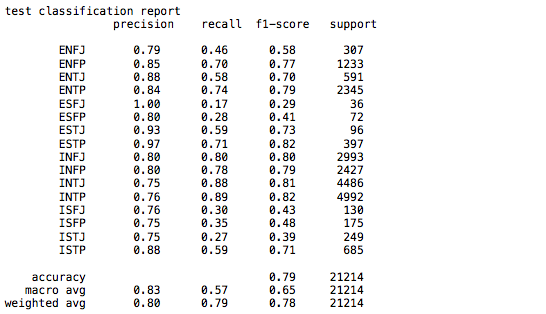

In [ ]:
# accuracy
accuracy_score(test_predict_poly, test_y)

#### **RBF kernel**
*   Need accelerator
*   Need more RAM

In [ ]:
# model
model_svc_rbf = SVC(kernel='rbf')
model_svc_rbf.fit(train_post, train_y)

In [ ]:
from joblib import dump
dump(model_svc_rbf, '/content/drive/MyDrive/碩一下/資料探勘/期末報告/lemma&stem/model_svc_rbf.joblib') 

In [ ]:
# train
# train_predict_rbf = model_svc_rbf.predict(train_post)
# print('train classification report \n ', classification_report(train_y, train_predict_rbf, labels=np.unique(train_predict_rbf)))

In [ ]:
# test
test_predict_rbf = model_svc_rbf.predict(test_post)
print('test classification report \n ', classification_report(test_y, test_predict_rbf, labels=np.unique(test_predict_rbf)))

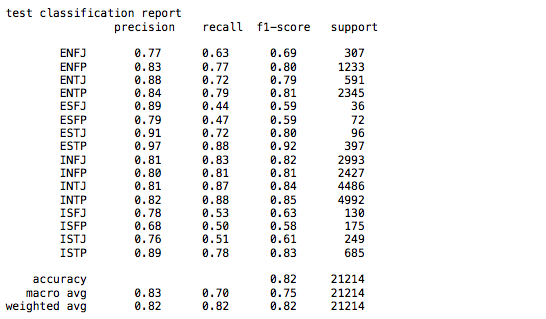

In [ ]:
# accuracy
accuracy_score(test_predict_rbf, test_y)